In [2]:
import scanpy as sc
import time
from pyROMA.ROMA import *
import os
import pandas as pd
import anndata
print(os.getcwd())
print(ROMA)

/home/az/Projects/01_Curie/05_pyROMA/pyROMA_shared
<class 'pyROMA.ROMA.ROMA'>


# scikit learn PCA just the matrix
comment: in rROMA, prcomp - it always uses retx=TRUE, which transposes the input matrix 

In [3]:
df = pd.read_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/pbulk_matrix_Rade2024_normalized.csv',index_col=0)
print(df.shape)
df.head()

(36602, 177)


MXMERZ002A_02_clusterCD4 T-Cell  MXMERZ002A_02_clusterCD8 T-Cell  \
CAR-BCMA                           -0.734156                        -0.734156   
MIR1302-2HG                        -0.734156                        -0.734156   
FAM138A                            -0.734156                        -0.734156   
OR4F5                              -0.734156                        -0.734156   
AL627309.1                         -0.734156                        -0.734156   

             MXMERZ002A_02_clustercDC  MXMERZ002A_02_clusterMono CD14  \
CAR-BCMA                    -0.734156                       -0.734156   
MIR1302-2HG                 -0.734156                       -0.052713   
FAM138A                     -0.734156                       -0.734156   
OR4F5                       -0.734156                       -0.734156   
AL627309.1                  -0.734156                       -0.052713   

             MXMERZ002A_02_clusterMono CD16  MXMERZ002A_02_clusterNK  \
CAR-BCMA                          -0.734156                -0.734156   
MIR1302-2HG                       -0.734156                -0.734156   
FAM138A                           -0.734156                -0.734156   
OR4F5                             -0.734156                -0.734156   
AL627309.1                        -0.734156                -0.734156   

             MXMERZ002A_02_clusterpDC  MXMERZ002A_02_clusterPlasma cell  \
CAR-BCMA                    -0.734156                         -0.734156   
MIR1302-2HG                 -0.734156                         -0.734156   
FAM138A                     -0.734156                         -0.734156   
OR4F5                       -0.734156                         -0.734156   
AL627309.1                  -0.734156                         -0.230462   

             MXMERZ002A_02_clusterProgenitor  MXMERZ002A_03_clusterB-Cell  \
CAR-BCMA                           -0.734156                    -0.734156   
MIR1302-2HG                        -0.734156                    -0.734156   
FAM138A                            -0.734156                    -0.734156   
OR4F5                              -0.734156                    -0.734156   
AL627309.1                         -0.734156                     0.829174   

             ...  MXMERZ002A_24_clusterPlasma cell  \
CAR-BCMA     ...                         -0.734156   
MIR1302-2HG  ...                         -0.734156   
FAM138A      ...                         -0.734156   
OR4F5        ...                         -0.734156   
AL627309.1   ...                         -0.734156   

             MXMERZ002A_24_clusterProgenitor  MXMERZ002A_25_clusterB-Cell  \
CAR-BCMA                           -0.734156                    -0.734156   
MIR1302-2HG                        -0.734156                    -0.734156   
FAM138A                            -0.734156                    -0.734156   
OR4F5                              -0.734156                    -0.734156   
AL627309.1                         -0.734156                    -0.734156   

             MXMERZ002A_25_clusterCD4 T-Cell  MXMERZ002A_25_clusterCD8 T-Cell  \
CAR-BCMA                           -0.734156                        -0.734156   
MIR1302-2HG                        -0.734156                        -0.734156   
FAM138A                            -0.734156                        -0.734156   
OR4F5                              -0.734156                        -0.734156   
AL627309.1                         -0.734156                        -0.734156   

             MXMERZ002A_25_clustercDC  MXMERZ002A_25_clusterMono CD14  \
CAR-BCMA                    -0.734156                       -0.734156   
MIR1302-2HG                 -0.734156                       -0.734156   
FAM138A                     -0.734156                       -0.734156   
OR4F5                       -0.734156                       -0.734156   
AL627309.1                  -0.734156                        2.151458   

             MXMERZ002A_25

In [6]:
adata = anndata.AnnData(df.T)
adata

AnnData object with n_obs × n_vars = 177 × 36602

In [7]:
adata.X.shape

(177, 36602)

In [5]:
from sklearn.decomposition import PCA

algorithm='auto'

X = df - df.mean(axis=0)

svd = PCA(n_components=2, svd_solver=algorithm) #algorithm='arpack')
svd.fit(X)

print('Algorithm auto: ', svd.explained_variance_ratio_)

algorithm = 'arpack'
svd = PCA(n_components=2, svd_solver=algorithm)
svd.fit(X)

print('Algorithm arpakc: ', svd.explained_variance_ratio_)

Algorithm auto:  [0.83890555 0.02520309]
Algorithm arpakc:  [0.83890555 0.02520309]


In [9]:
from sklearn.decomposition import PCA

algorithm='auto'

X = df - df.mean(axis=0)

svd = PCA(n_components=2, svd_solver=algorithm) #algorithm='arpack')
svd.fit(X.T)

print('Algorithm auto: ', svd.explained_variance_ratio_)

Algorithm auto:  [0.18360319 0.1338817 ]


In [10]:
algorithm='auto'

#X = df - df.mean(axis=0)
X = adata.X - adata.X.mean(axis=0) 


svd = PCA(n_components=2, svd_solver=algorithm) #algorithm='arpack')
svd.fit(X)

print('Algorithm auto: ', svd.explained_variance_ratio_)

Algorithm auto:  [0.25883605 0.12138381]


In [11]:
algorithm='auto'

X = adata.X - adata.X.mean(axis=) 


svd = PCA(n_components=2, svd_solver=algorithm) #algorithm='arpack')
svd.fit(X)

print('Algorithm auto: ', svd.explained_variance_ratio_)

ValueError: operands could not be broadcast together with shapes (177,36602) (177,) 

In [13]:
adata.X.mean(axis=0).shape

(36602,)

In [14]:
adata.X.mean(axis=1).shape

(177,)

In [2]:
# Initialize ROMA
roma = ROMA()
# this should be empty at first
roma.adata

In [3]:
roma

scROMA

In [4]:
df = pd.read_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/pbulk_matrix_Rade2024_normalized.csv',index_col=0)
print(df.shape)
df.head()

(36602, 177)


MXMERZ002A_02_clusterCD4 T-Cell  MXMERZ002A_02_clusterCD8 T-Cell  \
CAR-BCMA                           -0.734156                        -0.734156   
MIR1302-2HG                        -0.734156                        -0.734156   
FAM138A                            -0.734156                        -0.734156   
OR4F5                              -0.734156                        -0.734156   
AL627309.1                         -0.734156                        -0.734156   

             MXMERZ002A_02_clustercDC  MXMERZ002A_02_clusterMono CD14  \
CAR-BCMA                    -0.734156                       -0.734156   
MIR1302-2HG                 -0.734156                       -0.052713   
FAM138A                     -0.734156                       -0.734156   
OR4F5                       -0.734156                       -0.734156   
AL627309.1                  -0.734156                       -0.052713   

             MXMERZ002A_02_clusterMono CD16  MXMERZ002A_02_clusterNK  \
CAR-BCMA                          -0.734156                -0.734156   
MIR1302-2HG                       -0.734156                -0.734156   
FAM138A                           -0.734156                -0.734156   
OR4F5                             -0.734156                -0.734156   
AL627309.1                        -0.734156                -0.734156   

             MXMERZ002A_02_clusterpDC  MXMERZ002A_02_clusterPlasma cell  \
CAR-BCMA                    -0.734156                         -0.734156   
MIR1302-2HG                 -0.734156                         -0.734156   
FAM138A                     -0.734156                         -0.734156   
OR4F5                       -0.734156                         -0.734156   
AL627309.1                  -0.734156                         -0.230462   

             MXMERZ002A_02_clusterProgenitor  MXMERZ002A_03_clusterB-Cell  \
CAR-BCMA                           -0.734156                    -0.734156   
MIR1302-2HG                        -0.734156                    -0.734156   
FAM138A                            -0.734156                    -0.734156   
OR4F5                              -0.734156                    -0.734156   
AL627309.1                         -0.734156                     0.829174   

             ...  MXMERZ002A_24_clusterPlasma cell  \
CAR-BCMA     ...                         -0.734156   
MIR1302-2HG  ...                         -0.734156   
FAM138A      ...                         -0.734156   
OR4F5        ...                         -0.734156   
AL627309.1   ...                         -0.734156   

             MXMERZ002A_24_clusterProgenitor  MXMERZ002A_25_clusterB-Cell  \
CAR-BCMA                           -0.734156                    -0.734156   
MIR1302-2HG                        -0.734156                    -0.734156   
FAM138A                            -0.734156                    -0.734156   
OR4F5                              -0.734156                    -0.734156   
AL627309.1                         -0.734156                    -0.734156   

             MXMERZ002A_25_clusterCD4 T-Cell  MXMERZ002A_25_clusterCD8 T-Cell  \
CAR-BCMA                           -0.734156                        -0.734156   
MIR1302-2HG                        -0.734156                        -0.734156   
FAM138A                            -0.734156                        -0.734156   
OR4F5                              -0.734156                        -0.734156   
AL627309.1                         -0.734156                        -0.734156   

             MXMERZ002A_25_clustercDC  MXMERZ002A_25_clusterMono CD14  \
CAR-BCMA                    -0.734156                       -0.734156   
MIR1302-2HG                 -0.734156                       -0.734156   
FAM138A                     -0.734156                       -0.734156   
OR4F5                       -0.734156                       -0.734156   
AL627309.1                  -0.734156                        2.151458   

             MXMERZ002A_25

In [5]:
adata = anndata.AnnData(df.T)
adata

AnnData object with n_obs × n_vars = 177 × 36602

In [6]:
# Genes are in the var
adata.var

Empty DataFrame
Columns: []
Index: [CAR-BCMA, MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.5, AL627309.4, AP006222.2, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, AL645608.6, AL645608.2, AL645608.4, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.7, HES4, ISG15, AL645608.1, AGRN, AL645608.5, AL645608.8, RNF223, C1orf159, AL390719.3, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, AL139287.1, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, AL391244.2, ANKRD65, AL391244.1, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.4, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, ...]

[36602 rows x 0 columns]

In [7]:
roma.adata = adata
print(roma.adata)

AnnData object with n_obs × n_vars = 177 × 36602


In [8]:
os.chdir('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/')
roma.gmt ='h.all.v2023.2.Hs.symbols.gmt'
# This function allows to load the patwhays into dictionary
pathways = roma.read_gmt_to_dict('h.all.v2023.2.Hs.symbols.gmt')

In [9]:
pathways_to_check = 'all'

In [10]:
roma

scROMA

In [11]:
# Filter pathways that have less genes than min_n_number
roma.min_n_genes

10

In [12]:
# Set the number of iterations to create the null distribution
iters = 1000

In [13]:
# Granularity of the null geneset size, from 0 to 100, less is more precise
roma.approx_int = 1

In [14]:
start = time.time()
# run it without outlier detection
roma.compute(pathways_to_check, parallel=True, incremental=True, iters=iters, loocv_on=False)
end = time.time()
minutes, seconds = divmod(end - start, 60)
print(f"sklearn PCA Parallel {iters} iterations, running time (min): " + "{:0>2}:{:05.2f}".format(int(minutes),seconds))

adata

Processing gene set: HALLMARK_NOTCH_SIGNALING | len of subsetlist:  32 
Processing gene set: HALLMARK_ANGIOGENESIS | len of subsetlist:  36 
Processing gene set: HALLMARK_HEDGEHOG_SIGNALING | len of subsetlist:  36 
Took null distribution from previous calculation
Processing gene set: HALLMARK_PANCREAS_BETA_CELLS | len of subsetlist:  40 
Processing gene set: HALLMARK_WNT_BETA_CATENIN_SIGNALING | len of subsetlist:  42 
Processing gene set: HALLMARK_APICAL_SURFACE | len of subsetlist:  44 
Processing gene set: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY | len of subsetlist:  49 
Processing gene set: HALLMARK_TGF_BETA_SIGNALING | len of subsetlist:  54 
Processing gene set: HALLMARK_MYC_TARGETS_V2 | len of subsetlist:  57 
Processing gene set: HALLMARK_CHOLESTEROL_HOMEOSTASIS | len of subsetlist:  74 
Processing gene set: HALLMARK_IL6_JAK_STAT3_SIGNALING | len of subsetlist:  87 
Processing gene set: HALLMARK_PROTEIN_SECRETION | len of subsetlist:  96 
Processing gene set: HALLMARK_INTERFE

AnnData object with n_obs × n_vars = 177 × 36602
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

In [15]:
roma

scROMA: module activities are computed

In [16]:
roma.adata

AnnData object with n_obs × n_vars = 177 × 36602
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

In [17]:
roma.adata.uns['ROMA_stats']

L1   p_value    Median_Exp  \
HALLMARK_NOTCH_SIGNALING                    0.223617  0.724638  6.124616e+00   
HALLMARK_ANGIOGENESIS                       0.301731  0.724638  1.096763e+00   
HALLMARK_HEDGEHOG_SIGNALING                 0.300757  0.724638  2.852503e-02   
HALLMARK_PANCREAS_BETA_CELLS                0.418582  0.724638  1.038390e-15   
HALLMARK_WNT_BETA_CATENIN_SIGNALING         0.297458  0.724638 -4.696854e-01   
HALLMARK_APICAL_SURFACE                     0.410542  0.724638  8.087366e-03   
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY    0.179593  0.724638 -5.632073e-01   
HALLMARK_TGF_BETA_SIGNALING                 0.168615  0.724638  4.223366e+00   
HALLMARK_MYC_TARGETS_V2                     0.126229  1.000000  8.569244e-02   
HALLMARK_CHOLESTEROL_HOMEOSTASIS            0.188159  0.724638  1.239394e+00   
HALLMARK_IL6_JAK_STAT3_SIGNALING            0.278191  0.724638  4.280811e+00   
HALLMARK_PROTEIN_SECRETION                  0.120397  0.724638  9.360596e+00   
HALLMARK_INTERFERON_ALPHA_RESPONSE          0.141397  0.724638  1.057751e+01   
HALLMARK_ANDROGEN_RESPONSE                  0.141333  1.000000  3.667235e+00   
HALLMARK_PEROXISOME                         0.173489  0.724638  2.566686e+00   
HALLMARK_PI3K_AKT_MTOR_SIGNALING            0.190769  0.724638  7.916879e-01   
HALLMARK_BILE_ACID_METABOLISM               0.210140  0.724638  4.781826e-02   
HALLMARK_UNFOLDED_PROTEIN_RESPONSE          0.114835  0.724638  2.928327e+00   
HALLMARK_SPERMATOGENESIS                    0.174581  0.724638  1.433895e+00   
HALLMARK_COAGULATION                        0.263299  0.724638  1.344421e+00   
HALLMARK_UV_RESPONSE_DN                     0.172084  0.724638  2.945086e+00   
HALLMARK_DNA_REPAIR                         0.098328  0.724638  1.316643e+00   
HALLMARK_FATTY_ACID_METABOLISM              0.134644  0.724638  5.023658e-01   
HALLMARK_UV_RESPONSE_UP                     0.207120  0.724638  2.487144e+00   
HALLMARK_APOPTOSIS                          0.237723  0.724638  9.545002e-01   
HALLMARK_IL2_STAT5_SIGNALING                0.254958  0.724638 -3.340326e-02   
HALLMARK_MITOTIC_SPINDLE                    0.186329  0.724638 -9.501329e-01   
HALLMARK_ADIPOGENESIS                       0.157731  0.724638  4.773269e+00   
HALLMARK_ALLOGRAFT_REJECTION                0.393105  0.724638  2.049047e-01   
HALLMARK_APICAL_JUNCTION                    0.236751  0.724638  1.727818e+00   
HALLMARK_COMPLEMENT                         0.328634  0.724638  1.875539e+00   
HALLMARK_E2F_TARGETS                        0.143979  0.724638 -2.566304e+00   
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION  0.247610  0.724638  1.717706e-01   
HALLMARK_ESTROGEN_RESPONSE_EARLY            0.248090  0.724638  6.161261e-02   
HALLMARK_ESTROGEN_RESPONSE_LATE             0.245260  0.724638  8.886952e-02   
HALLMARK_G2M_CHECKPOINT                     0.160792  0.724638 -4.256964e-01   
HALLMARK_GLYCOLYSIS                         0.187675  0.724638  4.119863e-01   
HALLMARK_HEME_METABOLISM                    0.190222  0.724638 -3.138034e-02   
HALLMARK_HYPOXIA                            0.217096  0.724638  1.651744e+00   
HALLMARK_INFLAMMATORY_RESPONSE              0.316611  0.724638  3.469881e+00   
HALLMARK_INTERFERON_GAMMA_RESPONSE          0.239680  0.724638  7.933450e-01   
HALLMARK_KRAS_SIGNALING_DN                  0.175301  0.724638  4.663602e-02   
HALLMARK_KRAS_SIGNALING_UP                  0.272970  0.724638  8.477195e-01   
HALLMARK_MTORC1_SIGNALING                   0.157568  0.724638  2.288717e+00   
HALLMARK_MYC_TARGETS_V1                     0.104091  1.000000  6.840056e+00   
HALLMARK_MYOGENESIS                         0.213908  0.724638  1.108970e-15   
HALLMARK_OXIDATIVE_PHOSPHORYLATION          0.117978  1.000000  4.529189e-01   
HALLMARK_P53_PATHWAY                        0.197503  0.724638  1.317613e+00   
HALLMARK_TNFA_SIGNALING_VIA_NFKB            0.222648  0.724638  3.959515e+00   
HALLMARK_XENOBIOTIC_METABOLISM              0.2156

In [18]:
type(roma.adata)

anndata._core.anndata.AnnData

In [19]:
type(adata.uns['ROMA'])

dict

In [20]:
type(adata.uns['ROMA_stats'])

pandas.core.frame.DataFrame

In [21]:
def save_ROMA_results(adata, path):
    # saves the adata to a path
    import pickle 
    d = adata.uns['ROMA']

    with open(f'{path}.pickle', 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

    del adata.uns['ROMA']
    adata.write(f"{path}.h5ad")

    return

def load_ROMA_results(path):
    # loads the results into adata
    import pickle
    import scanpy as sc 

    with open(f'{path}.pickle', 'rb') as handle:
        d = pickle.load(handle)

    adata = sc.read_h5ad(f'{path}.h5ad')
    adata.uns['ROMA'] = d

    return adata

In [22]:
adata_backup = roma.adata.copy()

In [23]:
path_to_save = '/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/pyroma_outputs/RadeData_PCA'
save_ROMA_results(adata=roma.adata, path=path_to_save)

In [24]:
del roma.adata

In [25]:
roma.adata

AttributeError: 'ROMA' object has no attribute 'adata'

In [26]:
roma.adata = load_ROMA_results(path_to_save)

In [27]:
roma.adata

AnnData object with n_obs × n_vars = 177 × 36602
    uns: 'ROMA_active_modules', 'ROMA_stats', 'ROMA'

In [28]:
roma.adata.uns['ROMA_stats'].to_csv('pyroma_outputs/ROMA_stats_PCA.csv')

# Compare rROMA and pyROMA

In [29]:
rROMA_df = pd.read_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_module_matrix.csv', index_col=[0])
rROMA_df.head()

L1  Median L1  ppv L1     L1/L2  \
HALLMARK_ADIPOGENESIS         0.129883   0.198628    1.00  0.974184   
HALLMARK_ALLOGRAFT_REJECTION  0.390254   0.198628    0.00  4.241984   
HALLMARK_ANDROGEN_RESPONSE    0.115085   0.211010    1.00  1.017066   
HALLMARK_ANGIOGENESIS         0.296008   0.260650    0.24  1.338702   
HALLMARK_APICAL_JUNCTION      0.234288   0.198628    0.01  1.688134   

                              Median L1/L2  ppv L1/L2  Median Exp  \
HALLMARK_ADIPOGENESIS             1.425571       1.00    9.257435   
HALLMARK_ALLOGRAFT_REJECTION      1.425571       0.00   -0.769921   
HALLMARK_ANDROGEN_RESPONSE        1.449478       1.00   -6.831589   
HALLMARK_ANGIOGENESIS             1.640605       0.76   -0.154860   
HALLMARK_APICAL_JUNCTION          1.425571       0.22   -0.423093   

                              ppv Median Exp      q L1   q L1/L2  q Median Exp  
HALLMARK_ADIPOGENESIS                   0.00  1.000000  1.000000      0.000000  
HALLMARK_ALLOGRAFT_REJECTION            0.98  0.000000  0.000000      0.990625  
HALLMARK_ANDROGEN_RESPONSE              0.00  1.000000  1.000000      0.000000  
HALLMARK_ANGIOGENESIS                   0.96  0.666667  1.000000      0.990625  
HALLMARK_APICAL_JUNCTION                0.99  0.041667  0.676471      0.990625

In [30]:
pyroma = roma.adata.uns['ROMA_stats'].copy()
pyroma.head()

L1   p_value    Median_Exp  \
HALLMARK_NOTCH_SIGNALING             0.223617  0.724638  6.124616e+00   
HALLMARK_ANGIOGENESIS                0.301731  0.724638  1.096763e+00   
HALLMARK_HEDGEHOG_SIGNALING          0.300757  0.724638  2.852503e-02   
HALLMARK_PANCREAS_BETA_CELLS         0.418582  0.724638  1.038390e-15   
HALLMARK_WNT_BETA_CATENIN_SIGNALING  0.297458  0.724638 -4.696854e-01   

                                      q_value  
HALLMARK_NOTCH_SIGNALING             0.004163  
HALLMARK_ANGIOGENESIS                0.140138  
HALLMARK_HEDGEHOG_SIGNALING          0.317074  
HALLMARK_PANCREAS_BETA_CELLS         0.318830  
HALLMARK_WNT_BETA_CATENIN_SIGNALING  0.359016

In [32]:
# Extract Median Exp L1

In [31]:
rROMA_df.shape

(50, 11)

In [32]:
pyroma.shape

(50, 4)

In [33]:
merged_df = pd.merge(rROMA_df, pyroma, left_index=True, right_index=True, suffixes=('_R', '_py'))
merged_df.head()

L1_R  Median L1  ppv L1     L1/L2  \
HALLMARK_ADIPOGENESIS         0.129883   0.198628    1.00  0.974184   
HALLMARK_ALLOGRAFT_REJECTION  0.390254   0.198628    0.00  4.241984   
HALLMARK_ANDROGEN_RESPONSE    0.115085   0.211010    1.00  1.017066   
HALLMARK_ANGIOGENESIS         0.296008   0.260650    0.24  1.338702   
HALLMARK_APICAL_JUNCTION      0.234288   0.198628    0.01  1.688134   

                              Median L1/L2  ppv L1/L2  Median Exp  \
HALLMARK_ADIPOGENESIS             1.425571       1.00    9.257435   
HALLMARK_ALLOGRAFT_REJECTION      1.425571       0.00   -0.769921   
HALLMARK_ANDROGEN_RESPONSE        1.449478       1.00   -6.831589   
HALLMARK_ANGIOGENESIS             1.640605       0.76   -0.154860   
HALLMARK_APICAL_JUNCTION          1.425571       0.22   -0.423093   

                              ppv Median Exp      q L1   q L1/L2  \
HALLMARK_ADIPOGENESIS                   0.00  1.000000  1.000000   
HALLMARK_ALLOGRAFT_REJECTION            0.98  0.000000  0.000000   
HALLMARK_ANDROGEN_RESPONSE              0.00  1.000000  1.000000   
HALLMARK_ANGIOGENESIS                   0.96  0.666667  1.000000   
HALLMARK_APICAL_JUNCTION                0.99  0.041667  0.676471   

                              q Median Exp     L1_py   p_value  Median_Exp  \
HALLMARK_ADIPOGENESIS             0.000000  0.157731  0.724638    4.773269   
HALLMARK_ALLOGRAFT_REJECTION      0.990625  0.393105  0.724638    0.204905   
HALLMARK_ANDROGEN_RESPONSE        0.000000  0.141333  1.000000    3.667235   
HALLMARK_ANGIOGENESIS             0.990625  0.301731  0.724638    1.096763   
HALLMARK_APICAL_JUNCTION          0.990625  0.236751  0.724638    1.727818   

                               q_value  
HALLMARK_ADIPOGENESIS         0.004163  
HALLMARK_ALLOGRAFT_REJECTION  0.140138  
HALLMARK_ANDROGEN_RESPONSE    0.004163  
HALLMARK_ANGIOGENESIS         0.140138  
HALLMARK_APICAL_JUNCTION      0.129181

In [34]:
merged_df.shape

(50, 15)

In [35]:
merged_df[['L1_R', 'L1_py', 'ppv L1','p_value', 'Median Exp', 'Median_Exp','q Median Exp', 'q_value' ]]

L1_R     L1_py  ppv L1  \
HALLMARK_ADIPOGENESIS                       0.129883  0.157731    1.00   
HALLMARK_ALLOGRAFT_REJECTION                0.390254  0.393105    0.00   
HALLMARK_ANDROGEN_RESPONSE                  0.115085  0.141333    1.00   
HALLMARK_ANGIOGENESIS                       0.296008  0.301731    0.24   
HALLMARK_APICAL_JUNCTION                    0.234288  0.236751    0.01   
HALLMARK_APICAL_SURFACE                     0.410351  0.410542    0.00   
HALLMARK_APOPTOSIS                          0.212387  0.237723    0.24   
HALLMARK_BILE_ACID_METABOLISM               0.209202  0.210140    0.46   
HALLMARK_CHOLESTEROL_HOMEOSTASIS            0.156816  0.188159    0.99   
HALLMARK_COAGULATION                        0.262133  0.263299    0.01   
HALLMARK_COMPLEMENT                         0.311857  0.328634    0.00   
HALLMARK_DNA_REPAIR                         0.054802  0.098328    1.00   
HALLMARK_E2F_TARGETS                        0.052095  0.143979    1.00   
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION  0.247274  0.247610    0.00   
HALLMARK_ESTROGEN_RESPONSE_EARLY            0.247689  0.248090    0.00   
HALLMARK_ESTROGEN_RESPONSE_LATE             0.244319  0.245260    0.00   
HALLMARK_FATTY_ACID_METABOLISM              0.113011  0.134644    1.00   
HALLMARK_G2M_CHECKPOINT                     0.079111  0.160792    1.00   
HALLMARK_GLYCOLYSIS                         0.165898  0.187675    1.00   
HALLMARK_HEDGEHOG_SIGNALING                 0.300483  0.300757    0.20   
HALLMARK_HEME_METABOLISM                    0.167447  0.190222    1.00   
HALLMARK_HYPOXIA                            0.206203  0.217096    0.31   
HALLMARK_IL2_STAT5_SIGNALING                0.254344  0.254958    0.00   
HALLMARK_IL6_JAK_STAT3_SIGNALING            0.257806  0.278191    0.07   
HALLMARK_INFLAMMATORY_RESPONSE              0.303830  0.316611    0.00   
HALLMARK_INTERFERON_ALPHA_RESPONSE          0.113747  0.141397    1.00   
HALLMARK_INTERFERON_GAMMA_RESPONSE          0.115875  0.239680    1.00   
HALLMARK_KRAS_SIGNALING_DN                  0.175279  0.175301    0.95   
HALLMARK_KRAS_SIGNALING_UP                  0.270726  0.272970    0.00   
HALLMARK_MITOTIC_SPINDLE                    0.069785  0.186329    1.00   
HALLMARK_MTORC1_SIGNALING                   0.071542  0.157568    1.00   
HALLMARK_MYC_TARGETS_V1                     0.055770  0.104091    1.00   
HALLMARK_MYC_TARGETS_V2                     0.044532  0.126229    1.00   
HALLMARK_MYOGENESIS                         0.213694  0.213908    0.16   
HALLMARK_NOTCH_SIGNALING                    0.208068  0.223617    0.95   
HALLMARK_OXIDATIVE_PHOSPHORYLATION          0.048424  0.117978    1.00   
HALLMARK_P53_PATHWAY                        0.163679  0.197503    1.00   
HALLMARK_PANCREAS_BETA_CELLS                0.418310  0.418582    0.00   
HALLMARK_PEROXISOME                         0.121004  0.173489    1.00   
HALLMARK_PI3K_AKT_MTOR_SIGNALING            0.088799  0.190769    1.00   
HALLMARK_PROTEIN_SECRETION                  0.093887  0.120397    1.00   
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY    0.043703  0.179593    1.00   
HALLMARK_SPERMATOGENESIS                    0.173877  0.174581    0.95   
HALLMARK_TGF_BETA_SIGNALING                 0.140248  0.168615    1.00   
HALLMARK_TNFA_SIGNALING_VIA_NFKB            0.166778  0.222648    1.00   
HALLMARK_UNFOLDED_PROTEIN_RESPONSE          0.069121  0.114835    1.00   
HALLMARK_UV_RESPONSE_DN                     0.155753  0.172084    1.00   
HALLMARK_UV_RESPONSE_UP                     0.179762  0.207120    0.88   
HALLMARK_WNT_BETA_CATENIN_SIGNALING         0.293957  0.297458    0.24   
HALLMARK_XENOBIOTIC_METABOLISM              0.209181  0.215663    0.28   

                                             p_value  Median Exp  \
HALLMARK_ADIPOGENESIS                       0.724638    9.257435   
HALLMARK_ALLOGRAFT_REJECTION                0.724638   -0.769921   
HALLMARK_ANDROGEN_RESPONSE                  1.000000   -6.831589   
H

In [36]:
merged_df = pd.merge(rROMA_df, pyroma, left_index=True, right_index=True, suffixes=('_R', '_py'))
merged_df.head()

L1_R  Median L1  ppv L1     L1/L2  \
HALLMARK_ADIPOGENESIS         0.129883   0.198628    1.00  0.974184   
HALLMARK_ALLOGRAFT_REJECTION  0.390254   0.198628    0.00  4.241984   
HALLMARK_ANDROGEN_RESPONSE    0.115085   0.211010    1.00  1.017066   
HALLMARK_ANGIOGENESIS         0.296008   0.260650    0.24  1.338702   
HALLMARK_APICAL_JUNCTION      0.234288   0.198628    0.01  1.688134   

                              Median L1/L2  ppv L1/L2  Median Exp  \
HALLMARK_ADIPOGENESIS             1.425571       1.00    9.257435   
HALLMARK_ALLOGRAFT_REJECTION      1.425571       0.00   -0.769921   
HALLMARK_ANDROGEN_RESPONSE        1.449478       1.00   -6.831589   
HALLMARK_ANGIOGENESIS             1.640605       0.76   -0.154860   
HALLMARK_APICAL_JUNCTION          1.425571       0.22   -0.423093   

                              ppv Median Exp      q L1   q L1/L2  \
HALLMARK_ADIPOGENESIS                   0.00  1.000000  1.000000   
HALLMARK_ALLOGRAFT_REJECTION            0.98  0.000000  0.000000   
HALLMARK_ANDROGEN_RESPONSE              0.00  1.000000  1.000000   
HALLMARK_ANGIOGENESIS                   0.96  0.666667  1.000000   
HALLMARK_APICAL_JUNCTION                0.99  0.041667  0.676471   

                              q Median Exp     L1_py   p_value  Median_Exp  \
HALLMARK_ADIPOGENESIS             0.000000  0.157731  0.724638    4.773269   
HALLMARK_ALLOGRAFT_REJECTION      0.990625  0.393105  0.724638    0.204905   
HALLMARK_ANDROGEN_RESPONSE        0.000000  0.141333  1.000000    3.667235   
HALLMARK_ANGIOGENESIS             0.990625  0.301731  0.724638    1.096763   
HALLMARK_APICAL_JUNCTION          0.990625  0.236751  0.724638    1.727818   

                               q_value  
HALLMARK_ADIPOGENESIS         0.004163  
HALLMARK_ALLOGRAFT_REJECTION  0.140138  
HALLMARK_ANDROGEN_RESPONSE    0.004163  
HALLMARK_ANGIOGENESIS         0.140138  
HALLMARK_APICAL_JUNCTION      0.129181

In [37]:
merged_df.shape

(50, 15)

In [38]:
new_merge = merged_df[['L1_R', 'L1_py', 'ppv L1','p_value', 'Median Exp', 'Median_Exp','q Median Exp', 'q_value' ]]
new_merge = new_merge.rename(columns={'ppv L1':'ppv L1_R',
                 'p_value':'p_value_py',
                  'Median Exp':'Median Exp_R',
                  'Median_Exp':'Median_Exp_py',
                  'q Median Exp':'q Median Exp_R',
                  'q_value':'q_value_py'})
new_merge.head()

L1_R     L1_py  ppv L1_R  p_value_py  \
HALLMARK_ADIPOGENESIS         0.129883  0.157731      1.00    0.724638   
HALLMARK_ALLOGRAFT_REJECTION  0.390254  0.393105      0.00    0.724638   
HALLMARK_ANDROGEN_RESPONSE    0.115085  0.141333      1.00    1.000000   
HALLMARK_ANGIOGENESIS         0.296008  0.301731      0.24    0.724638   
HALLMARK_APICAL_JUNCTION      0.234288  0.236751      0.01    0.724638   

                              Median Exp_R  Median_Exp_py  q Median Exp_R  \
HALLMARK_ADIPOGENESIS             9.257435       4.773269        0.000000   
HALLMARK_ALLOGRAFT_REJECTION     -0.769921       0.204905        0.990625   
HALLMARK_ANDROGEN_RESPONSE       -6.831589       3.667235        0.000000   
HALLMARK_ANGIOGENESIS            -0.154860       1.096763        0.990625   
HALLMARK_APICAL_JUNCTION         -0.423093       1.727818        0.990625   

                              q_value_py  
HALLMARK_ADIPOGENESIS           0.004163  
HALLMARK_ALLOGRAFT_REJECTION    0.140138  
HALLMARK_ANDROGEN_RESPONSE      0.004163  
HALLMARK_ANGIOGENESIS           0.140138  
HALLMARK_APICAL_JUNCTION        0.129181

In [39]:
new_merge.to_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_pyroma_rroma_PCA.csv')

In [40]:

new_merge

L1_R     L1_py  ppv L1_R  \
HALLMARK_ADIPOGENESIS                       0.129883  0.157731      1.00   
HALLMARK_ALLOGRAFT_REJECTION                0.390254  0.393105      0.00   
HALLMARK_ANDROGEN_RESPONSE                  0.115085  0.141333      1.00   
HALLMARK_ANGIOGENESIS                       0.296008  0.301731      0.24   
HALLMARK_APICAL_JUNCTION                    0.234288  0.236751      0.01   
HALLMARK_APICAL_SURFACE                     0.410351  0.410542      0.00   
HALLMARK_APOPTOSIS                          0.212387  0.237723      0.24   
HALLMARK_BILE_ACID_METABOLISM               0.209202  0.210140      0.46   
HALLMARK_CHOLESTEROL_HOMEOSTASIS            0.156816  0.188159      0.99   
HALLMARK_COAGULATION                        0.262133  0.263299      0.01   
HALLMARK_COMPLEMENT                         0.311857  0.328634      0.00   
HALLMARK_DNA_REPAIR                         0.054802  0.098328      1.00   
HALLMARK_E2F_TARGETS                        0.052095  0.143979      1.00   
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION  0.247274  0.247610      0.00   
HALLMARK_ESTROGEN_RESPONSE_EARLY            0.247689  0.248090      0.00   
HALLMARK_ESTROGEN_RESPONSE_LATE             0.244319  0.245260      0.00   
HALLMARK_FATTY_ACID_METABOLISM              0.113011  0.134644      1.00   
HALLMARK_G2M_CHECKPOINT                     0.079111  0.160792      1.00   
HALLMARK_GLYCOLYSIS                         0.165898  0.187675      1.00   
HALLMARK_HEDGEHOG_SIGNALING                 0.300483  0.300757      0.20   
HALLMARK_HEME_METABOLISM                    0.167447  0.190222      1.00   
HALLMARK_HYPOXIA                            0.206203  0.217096      0.31   
HALLMARK_IL2_STAT5_SIGNALING                0.254344  0.254958      0.00   
HALLMARK_IL6_JAK_STAT3_SIGNALING            0.257806  0.278191      0.07   
HALLMARK_INFLAMMATORY_RESPONSE              0.303830  0.316611      0.00   
HALLMARK_INTERFERON_ALPHA_RESPONSE          0.113747  0.141397      1.00   
HALLMARK_INTERFERON_GAMMA_RESPONSE          0.115875  0.239680      1.00   
HALLMARK_KRAS_SIGNALING_DN                  0.175279  0.175301      0.95   
HALLMARK_KRAS_SIGNALING_UP                  0.270726  0.272970      0.00   
HALLMARK_MITOTIC_SPINDLE                    0.069785  0.186329      1.00   
HALLMARK_MTORC1_SIGNALING                   0.071542  0.157568      1.00   
HALLMARK_MYC_TARGETS_V1                     0.055770  0.104091      1.00   
HALLMARK_MYC_TARGETS_V2                     0.044532  0.126229      1.00   
HALLMARK_MYOGENESIS                         0.213694  0.213908      0.16   
HALLMARK_NOTCH_SIGNALING                    0.208068  0.223617      0.95   
HALLMARK_OXIDATIVE_PHOSPHORYLATION          0.048424  0.117978      1.00   
HALLMARK_P53_PATHWAY                        0.163679  0.197503      1.00   
HALLMARK_PANCREAS_BETA_CELLS                0.418310  0.418582      0.00   
HALLMARK_PEROXISOME                         0.121004  0.173489      1.00   
HALLMARK_PI3K_AKT_MTOR_SIGNALING            0.088799  0.190769      1.00   
HALLMARK_PROTEIN_SECRETION                  0.093887  0.120397      1.00   
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY    0.043703  0.179593      1.00   
HALLMARK_SPERMATOGENESIS                    0.173877  0.174581      0.95   
HALLMARK_TGF_BETA_SIGNALING                 0.140248  0.168615      1.00   
HALLMARK_TNFA_SIGNALING_VIA_NFKB            0.166778  0.222648      1.00   
HALLMARK_UNFOLDED_PROTEIN_RESPONSE          0.069121  0.114835      1.00   
HALLMARK_UV_RESPONSE_DN                     0.155753  0.172084      1.00   
HALLMARK_UV_RESPONSE_UP                     0.179762  0.207120      0.88   
HALLMARK_WNT_BETA_CATENIN_SIGNALING         0.293957  0.297458      0.24   
HALLMARK_XENOBIOTIC_METABOLISM              0.209181  0.215663      0.28   

                                            p_value_py  Median Exp_R  \
HALLMARK_ADIPOGENESIS                         0.724638      9.257435   
HALLMARK_ALLOGRAFT_REJECTIO

In [60]:
difference_df = pd.DataFrame(np.absolute(new_merge['L1_R'] - new_merge['L1_py']))
difference_df.columns = ['L1 R-py']
difference_df.sort_values(by='L1 R-py', ascending=False).head()

L1 R-py
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY  0.135890
HALLMARK_INTERFERON_GAMMA_RESPONSE        0.123805
HALLMARK_MITOTIC_SPINDLE                  0.116544
HALLMARK_PI3K_AKT_MTOR_SIGNALING          0.101970
HALLMARK_E2F_TARGETS                      0.091884

In [61]:
difference_df.mean()

L1 R-py    0.031554
dtype: float64

In [62]:
difference_df.median()

L1 R-py    0.021705
dtype: float64

In [43]:
difference_df['Median Exp R-py'] = np.absolute(new_merge['Median Exp_R'] - new_merge['Median_Exp_py'])
difference_df.head()

L1 R-py  Median Exp R-py
HALLMARK_ADIPOGENESIS         0.027848         4.484166
HALLMARK_ALLOGRAFT_REJECTION  0.002851         0.974826
HALLMARK_ANDROGEN_RESPONSE    0.026249        10.498824
HALLMARK_ANGIOGENESIS         0.005723         1.251623
HALLMARK_APICAL_JUNCTION      0.002464         2.150911

In [44]:
difference_df.mean()

L1 R-py            0.031554
Median Exp R-py    5.010603
dtype: float64

In [45]:
# adjusted p_values for L1 (in R = q L1, in py = p_value)
difference_df['p_value L1 R-py'] = np.absolute(merged_df['q L1'] - new_merge['p_value_py'] )
difference_df['q_value Med Exp R-py'] = np.absolute(new_merge['q Median Exp_R'] - new_merge['q_value_py'])

difference_df.head()

L1 R-py  Median Exp R-py  p_value L1 R-py  \
HALLMARK_ADIPOGENESIS         0.027848         4.484166         0.275362   
HALLMARK_ALLOGRAFT_REJECTION  0.002851         0.974826         0.724638   
HALLMARK_ANDROGEN_RESPONSE    0.026249        10.498824         0.000000   
HALLMARK_ANGIOGENESIS         0.005723         1.251623         0.057971   
HALLMARK_APICAL_JUNCTION      0.002464         2.150911         0.682971   

                              q_value Med Exp R-py  
HALLMARK_ADIPOGENESIS                     0.004163  
HALLMARK_ALLOGRAFT_REJECTION              0.850487  
HALLMARK_ANDROGEN_RESPONSE                0.004163  
HALLMARK_ANGIOGENESIS                     0.850487  
HALLMARK_APICAL_JUNCTION                  0.861444

In [46]:
difference_df.mean()

L1 R-py                 0.031554
Median Exp R-py         5.010603
p_value L1 R-py         0.333496
q_value Med Exp R-py    0.410600
dtype: float64

In [47]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10)

L1 R-py  Median Exp R-py  \
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY  0.135890        11.391669   
HALLMARK_INTERFERON_GAMMA_RESPONSE        0.123805        10.635383   
HALLMARK_MITOTIC_SPINDLE                  0.116544         8.671230   
HALLMARK_PI3K_AKT_MTOR_SIGNALING          0.101970         8.391961   
HALLMARK_E2F_TARGETS                      0.091884        12.016346   
HALLMARK_MTORC1_SIGNALING                 0.086026        12.559977   
HALLMARK_MYC_TARGETS_V2                   0.081697        10.522536   
HALLMARK_G2M_CHECKPOINT                   0.081681         7.899350   
HALLMARK_OXIDATIVE_PHOSPHORYLATION        0.069554        11.863638   
HALLMARK_TNFA_SIGNALING_VIA_NFKB          0.055870         4.665918   

                                          p_value L1 R-py  \
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY         0.275362   
HALLMARK_INTERFERON_GAMMA_RESPONSE               0.275362   
HALLMARK_MITOTIC_SPINDLE                         0.275362   
HALLMARK_PI3K_AKT_MTOR_SIGNALING                 0.275362   
HALLMARK_E2F_TARGETS                             0.275362   
HALLMARK_MTORC1_SIGNALING                        0.275362   
HALLMARK_MYC_TARGETS_V2                          0.000000   
HALLMARK_G2M_CHECKPOINT                          0.275362   
HALLMARK_OXIDATIVE_PHOSPHORYLATION               0.000000   
HALLMARK_TNFA_SIGNALING_VIA_NFKB                 0.275362   

                                          q_value Med Exp R-py  
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY              0.364941  
HALLMARK_INTERFERON_GAMMA_RESPONSE                    0.129181  
HALLMARK_MITOTIC_SPINDLE                              0.134865  
HALLMARK_PI3K_AKT_MTOR_SIGNALING                      0.178393  
HALLMARK_E2F_TARGETS                                  0.515485  
HALLMARK_MTORC1_SIGNALING                             0.129181  
HALLMARK_MYC_TARGETS_V2                               0.291754  
HALLMARK_G2M_CHECKPOINT                               0.140138  
HALLMARK_OXIDATIVE_PHOSPHORYLATION                    0.129181  
HALLMARK_TNFA_SIGNALING_VIA_NFKB                      0.004163

In [48]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10).index.tolist()

['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE',
 'HALLMARK_MITOTIC_SPINDLE',
 'HALLMARK_PI3K_AKT_MTOR_SIGNALING',
 'HALLMARK_E2F_TARGETS',
 'HALLMARK_MTORC1_SIGNALING',
 'HALLMARK_MYC_TARGETS_V2',
 'HALLMARK_G2M_CHECKPOINT',
 'HALLMARK_OXIDATIVE_PHOSPHORYLATION',
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB']

In [49]:
non_adj_ps = {}
for k,v in roma.adata.uns['ROMA'].items():
    non_adj_ps[k] = v.non_adj_p
non_adj_ps = pd.Series(non_adj_ps)
non_adj_ps

HALLMARK_NOTCH_SIGNALING                      0.666667
HALLMARK_ANGIOGENESIS                         0.333333
HALLMARK_HEDGEHOG_SIGNALING                   0.333333
HALLMARK_PANCREAS_BETA_CELLS                  0.333333
HALLMARK_WNT_BETA_CATENIN_SIGNALING           0.666667
HALLMARK_APICAL_SURFACE                       0.333333
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY      0.666667
HALLMARK_TGF_BETA_SIGNALING                   0.666667
HALLMARK_MYC_TARGETS_V2                       1.000000
HALLMARK_CHOLESTEROL_HOMEOSTASIS              0.666667
HALLMARK_IL6_JAK_STAT3_SIGNALING              0.666667
HALLMARK_PROTEIN_SECRETION                    0.666667
HALLMARK_INTERFERON_ALPHA_RESPONSE            0.666667
HALLMARK_ANDROGEN_RESPONSE                    1.000000
HALLMARK_PEROXISOME                           0.666667
HALLMARK_PI3K_AKT_MTOR_SIGNALING              0.666667
HALLMARK_BILE_ACID_METABOLISM                 0.666667
HALLMARK_UNFOLDED_PROTEIN_RESPONSE            0.666667
HALLMARK_S

In [50]:
new_merge['ppv L1_R']

HALLMARK_ADIPOGENESIS                         1.00
HALLMARK_ALLOGRAFT_REJECTION                  0.00
HALLMARK_ANDROGEN_RESPONSE                    1.00
HALLMARK_ANGIOGENESIS                         0.24
HALLMARK_APICAL_JUNCTION                      0.01
HALLMARK_APICAL_SURFACE                       0.00
HALLMARK_APOPTOSIS                            0.24
HALLMARK_BILE_ACID_METABOLISM                 0.46
HALLMARK_CHOLESTEROL_HOMEOSTASIS              0.99
HALLMARK_COAGULATION                          0.01
HALLMARK_COMPLEMENT                           0.00
HALLMARK_DNA_REPAIR                           1.00
HALLMARK_E2F_TARGETS                          1.00
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION    0.00
HALLMARK_ESTROGEN_RESPONSE_EARLY              0.00
HALLMARK_ESTROGEN_RESPONSE_LATE               0.00
HALLMARK_FATTY_ACID_METABOLISM                1.00
HALLMARK_G2M_CHECKPOINT                       1.00
HALLMARK_GLYCOLYSIS                           1.00
HALLMARK_HEDGEHOG_SIGNALING    

In [51]:
difference_df['non_adj_p_L1 R-py'] = np.absolute(non_adj_ps - new_merge['ppv L1_R'])
difference_df.mean()

L1 R-py                 0.031554
Median Exp R-py         5.010603
p_value L1 R-py         0.333496
q_value Med Exp R-py    0.410600
non_adj_p_L1 R-py       0.323333
dtype: float64

In [52]:
difference_df.to_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_pyroma_rroma_PCA_difference.csv')


In [53]:
np.absolute(non_adj_ps - new_merge['ppv L1_R']).mean()

0.3233333333333333

In [54]:
np.absolute(non_adj_ps.sort_index() - new_merge['ppv L1_R']).mean()

0.3233333333333333

In [55]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10)

L1 R-py  Median Exp R-py  \
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY  0.135890        11.391669   
HALLMARK_INTERFERON_GAMMA_RESPONSE        0.123805        10.635383   
HALLMARK_MITOTIC_SPINDLE                  0.116544         8.671230   
HALLMARK_PI3K_AKT_MTOR_SIGNALING          0.101970         8.391961   
HALLMARK_E2F_TARGETS                      0.091884        12.016346   
HALLMARK_MTORC1_SIGNALING                 0.086026        12.559977   
HALLMARK_MYC_TARGETS_V2                   0.081697        10.522536   
HALLMARK_G2M_CHECKPOINT                   0.081681         7.899350   
HALLMARK_OXIDATIVE_PHOSPHORYLATION        0.069554        11.863638   
HALLMARK_TNFA_SIGNALING_VIA_NFKB          0.055870         4.665918   

                                          p_value L1 R-py  \
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY         0.275362   
HALLMARK_INTERFERON_GAMMA_RESPONSE               0.275362   
HALLMARK_MITOTIC_SPINDLE                         0.275362   
HALLMARK_PI3K_AKT_MTOR_SIGNALING                 0.275362   
HALLMARK_E2F_TARGETS                             0.275362   
HALLMARK_MTORC1_SIGNALING                        0.275362   
HALLMARK_MYC_TARGETS_V2                          0.000000   
HALLMARK_G2M_CHECKPOINT                          0.275362   
HALLMARK_OXIDATIVE_PHOSPHORYLATION               0.000000   
HALLMARK_TNFA_SIGNALING_VIA_NFKB                 0.275362   

                                          q_value Med Exp R-py  \
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY              0.364941   
HALLMARK_INTERFERON_GAMMA_RESPONSE                    0.129181   
HALLMARK_MITOTIC_SPINDLE                              0.134865   
HALLMARK_PI3K_AKT_MTOR_SIGNALING                      0.178393   
HALLMARK_E2F_TARGETS                                  0.515485   
HALLMARK_MTORC1_SIGNALING                             0.129181   
HALLMARK_MYC_TARGETS_V2                               0.291754   
HALLMARK_G2M_CHECKPOINT                               0.140138   
HALLMARK_OXIDATIVE_PHOSPHORYLATION                    0.129181   
HALLMARK_TNFA_SIGNALING_VIA_NFKB                      0.004163   

                                          non_adj_p_L1 R-py  
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY           0.333333  
HALLMARK_INTERFERON_GAMMA_RESPONSE                 0.333333  
HALLMARK_MITOTIC_SPINDLE                           0.333333  
HALLMARK_PI3K_AKT_MTOR_SIGNALING                   0.333333  
HALLMARK_E2F_TARGETS                               0.333333  
HALLMARK_MTORC1_SIGNALING                          0.333333  
HALLMARK_MYC_TARGETS_V2                            0.000000  
HALLMARK_G2M_CHECKPOINT                            0.333333  
HALLMARK_OXIDATIVE_PHOSPHORYLATION                 0.000000  
HALLMARK_TNFA_SIGNALING_VIA_NFKB                   0.333333

In [59]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10).index.tolist()

['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE',
 'HALLMARK_MITOTIC_SPINDLE',
 'HALLMARK_PI3K_AKT_MTOR_SIGNALING',
 'HALLMARK_E2F_TARGETS',
 'HALLMARK_MTORC1_SIGNALING',
 'HALLMARK_MYC_TARGETS_V2',
 'HALLMARK_G2M_CHECKPOINT',
 'HALLMARK_OXIDATIVE_PHOSPHORYLATION',
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB']

In [56]:
new_merge.loc[['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY']]

L1_R     L1_py  ppv L1_R  \
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY  0.043703  0.179593       1.0   

                                          p_value_py  Median Exp_R  \
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY    0.724638     10.828462   

                                          Median_Exp_py  q Median Exp_R  \
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY      -0.563207             0.0   

                                          q_value_py  
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY    0.364941

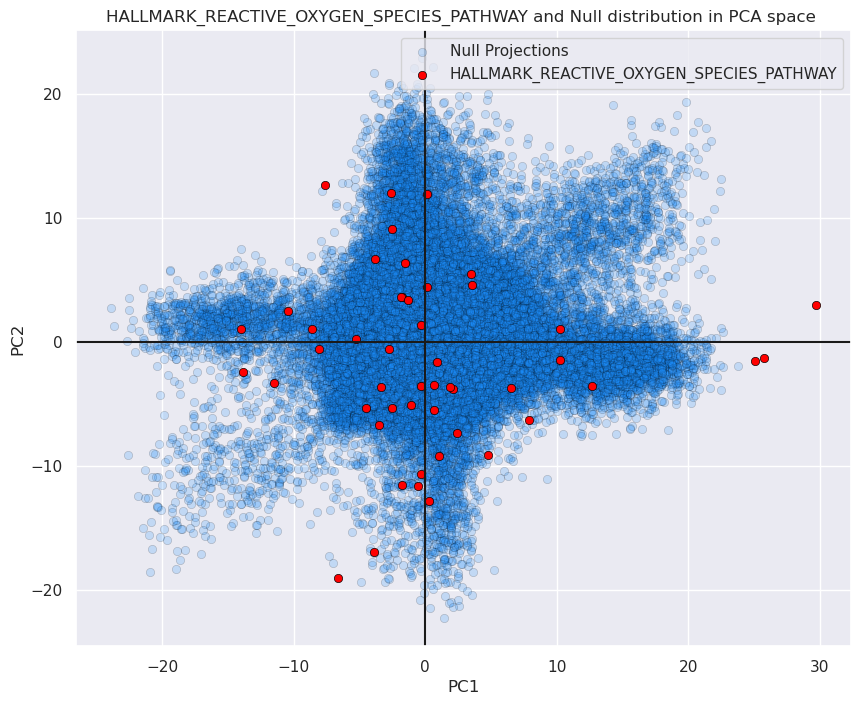

In [57]:
geneset_name = 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY'

roma.pl.adata = roma.adata

roma.pl.gene_projections(geneset_name)

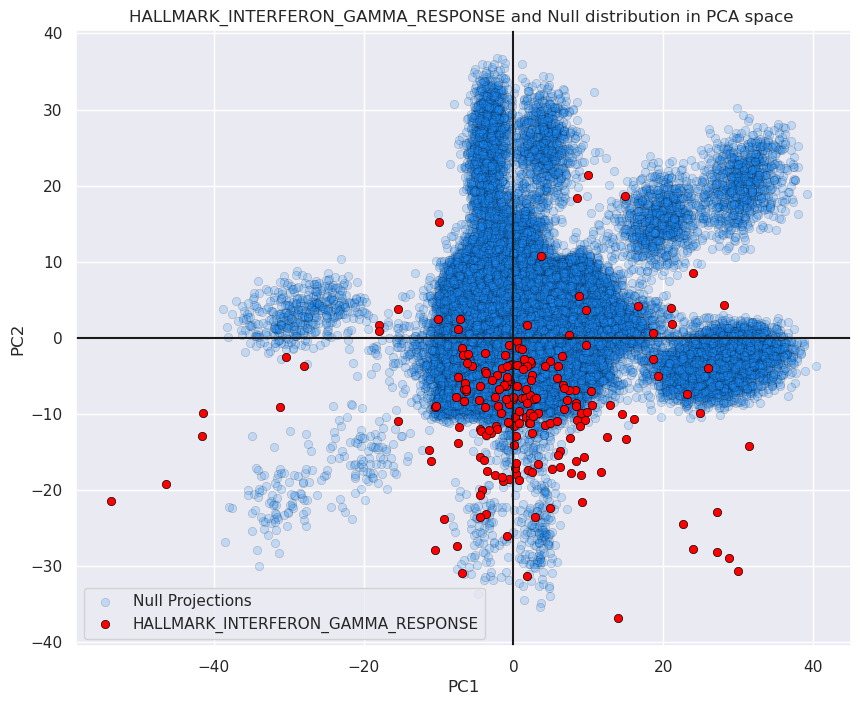

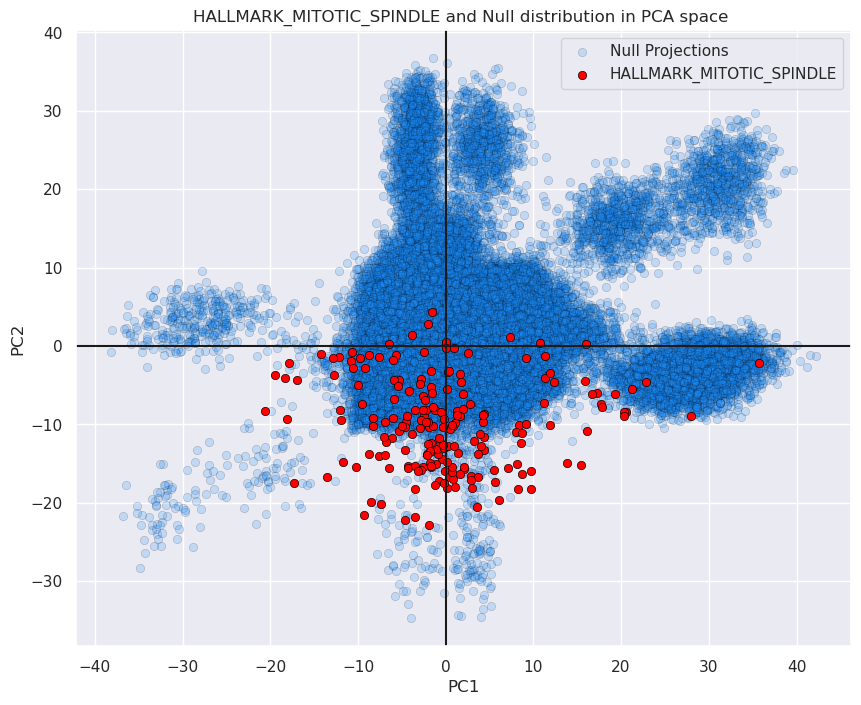

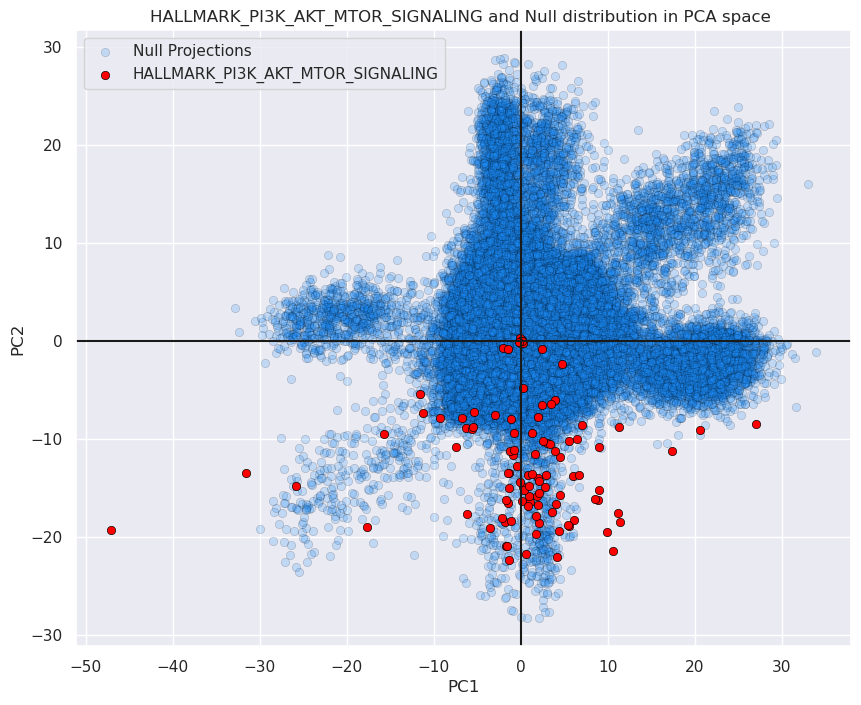

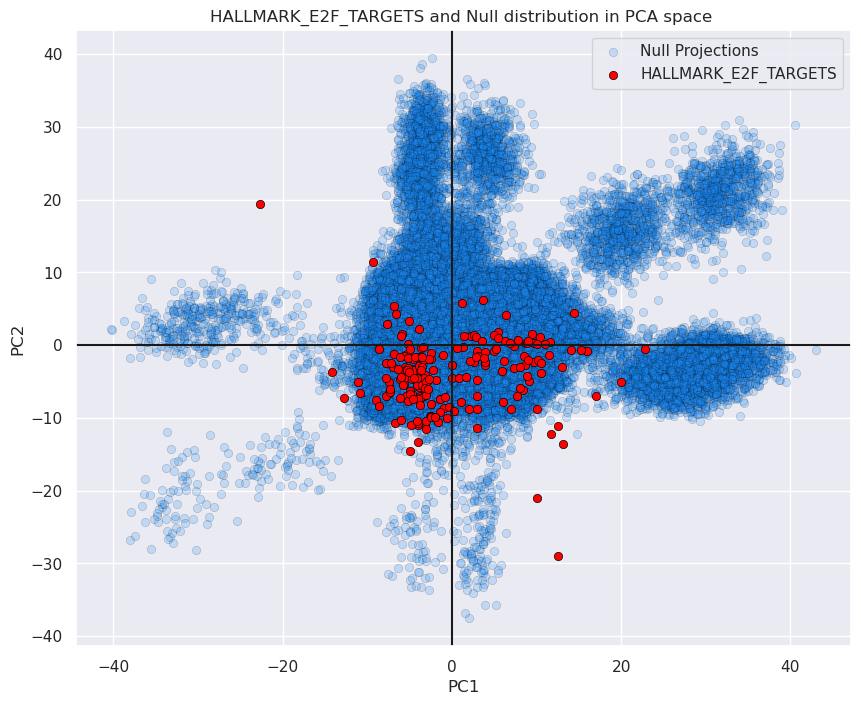

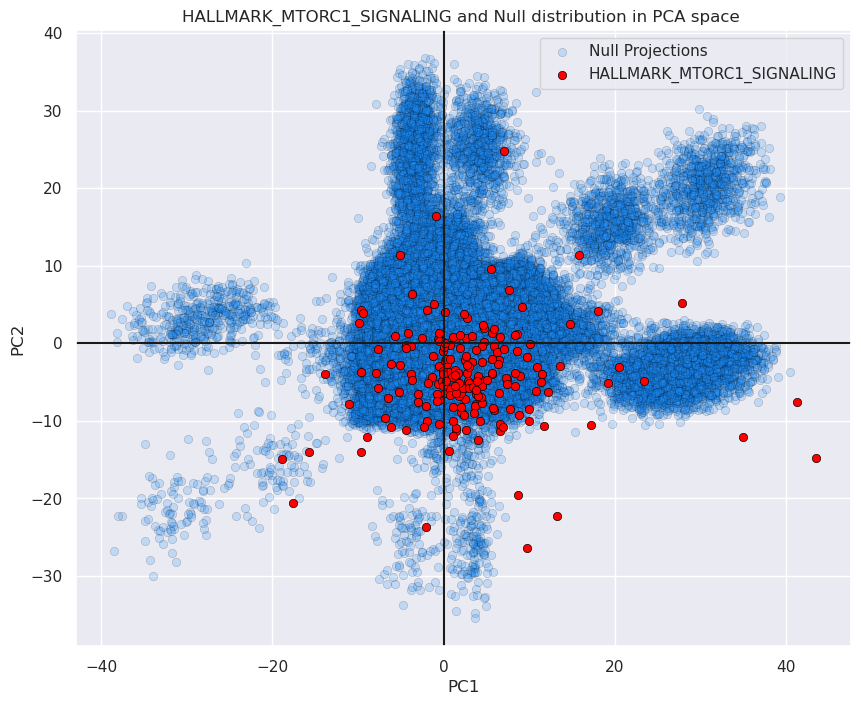

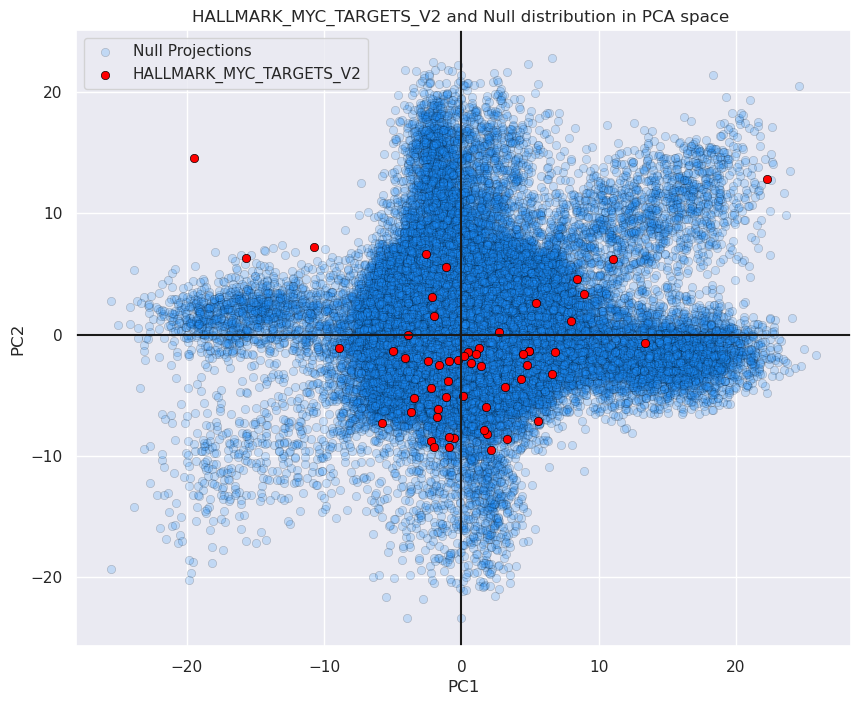

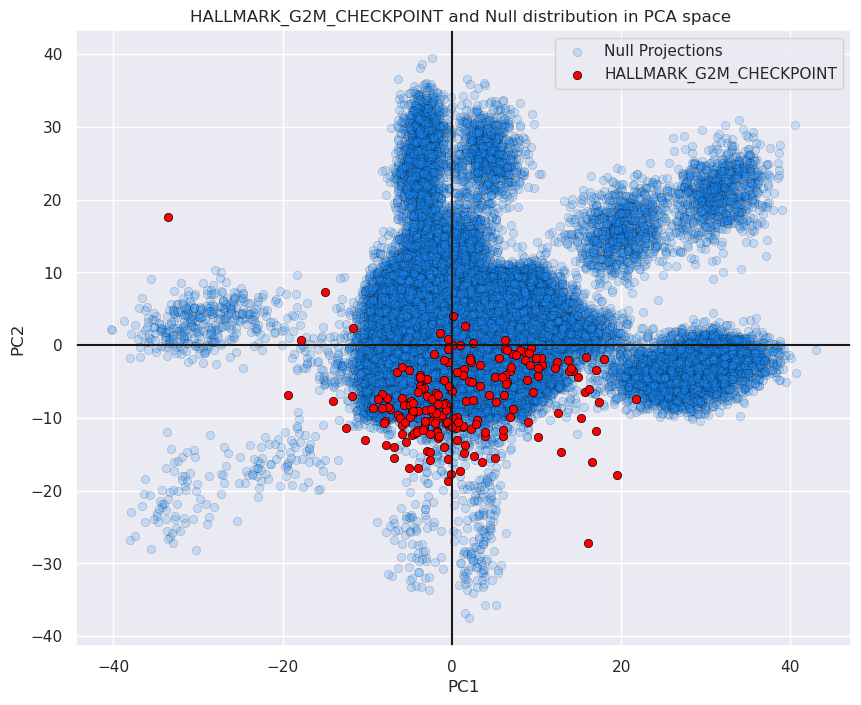

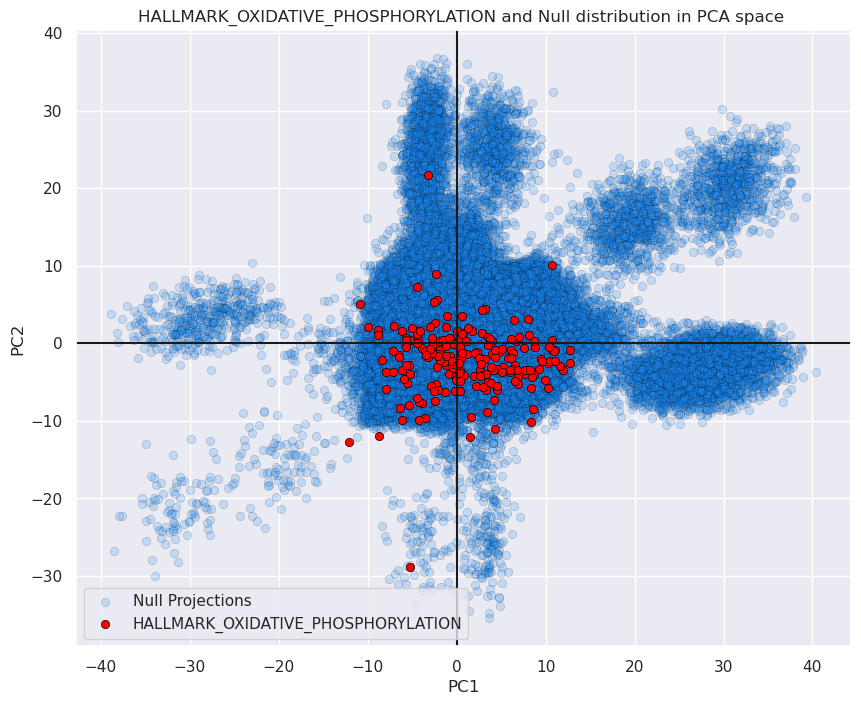

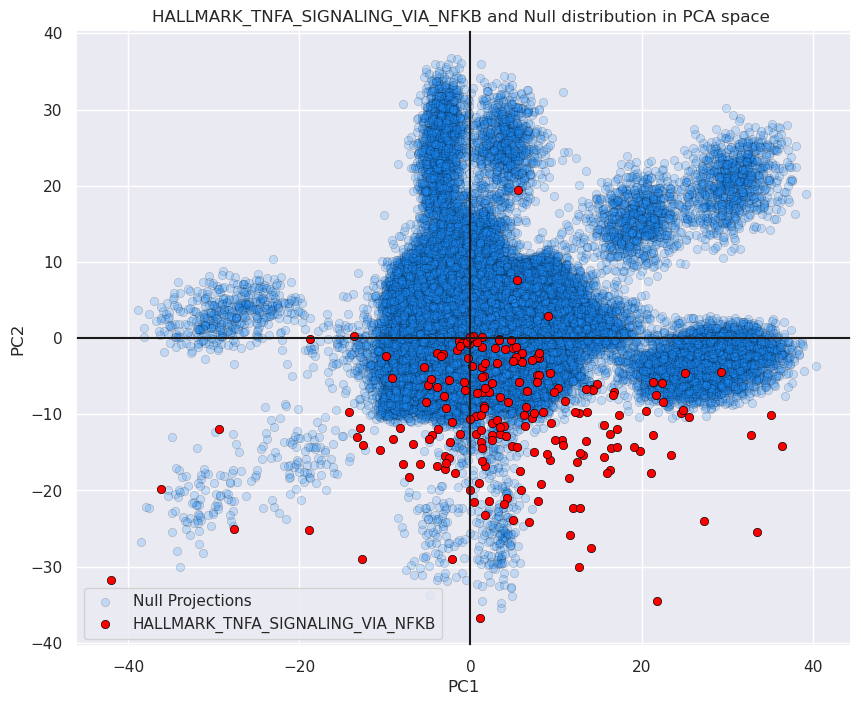

In [58]:
for geneset_name in difference_df.sort_values(by='L1 R-py', ascending=False).head(10).index.tolist()[1:]:
    roma.pl.gene_projections(geneset_name)

# Conclusion - PCA looks similar to Truncated SVD, and not similar to rROMA